In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
list_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden"
]

jobs_top4 = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

df_EU_top4 = df[df['job_country'].isin(list_countries) & df['job_title_short'].isin(jobs_top4)].copy()

In [4]:
df_EU_top4 = df_EU_top4.dropna(subset='salary_year_avg')
df_EU_top4_ex = df_EU_top4.explode('job_skills')
df_EU_top4_ex = df_EU_top4_ex.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_EU_top4_ex

,count,median
job_skills,,
python,679,101029.00
sql,573,102500.00
spark,290,111175.00
aws,264,103584.00
azure,222,98400.75
...,...,...
smartsheet,1,155000.00
symphony,1,89100.00
solidity,1,140000.00


In [27]:
df_EU_top4_ex['optimal_coefficient'] = pow(df_EU_top4_ex['count'], 1/3)*df_EU_top4_ex['median']/10000
df_EU_top4_ex = df_EU_top4_ex.sort_values(by='optimal_coefficient', ascending=False).head(10)
df_EU_top4_ex

,count,median,optimal_coefficient
job_skills,,,
python,679,101029.00,88.797890
sql,573,102500.00,85.135117
spark,290,111175.00,73.587910
aws,264,103584.00,66.449847
airflow,119,123000.00,60.499822
azure,222,98400.75,59.582136
tableau,182,100500.00,56.953864
snowflake,75,133000.00,56.088272
gcp,113,111175.00,53.748534


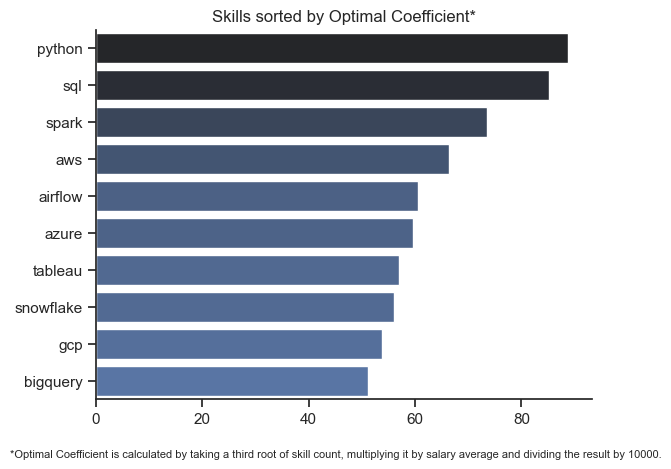

In [28]:
sns.barplot(data=df_EU_top4_ex, x='optimal_coefficient', y='job_skills', hue='optimal_coefficient', palette='dark:b_r', legend=False)

sns.set_theme(style='ticks')

sns.set_theme(style= 'ticks')
sns.despine()

plt.title('Skills sorted by Optimal Coefficient*')
plt.xlabel('')
plt.ylabel('')

plt.figtext(0.5, -0.01, "*Optimal Coefficient is calculated by taking a third root of skill count, multiplying it by salary average and dividing the result by 10000.", ha="center", fontsize=8)
plt.show()